In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings('ignore')



### Motivation

The goal of the experiment was to understand the impact of FL on user experience. The PLT metric was chosen because it is a key metric to measure the impact of FL on the browsing experience. The PLT metric is measured in milliseconds (ms). The lower the PLT, the better the user experience.

#### The two key questions we want to answer are:
<ul>
    <li>How does plt vary under FL vs idle scenario?</li>
    <li>Are the phones with low GB RAM impacted more than the phones with high GB RAM?</li>
</ul>

### Experiment

#### Data Description
<ul>
    <li> you know better shazer</li>
</ul>

#### Experiment Design
you know better shazer

In [101]:
# data_fl = []
# data_nonfl = []
# with open('s9_with_fl.txt', 'r') as f:
#     data = f.readlines()
#     # only remove \n from the end of each line
#     data = [x.strip() for x in data]
    

# print(data)

# with open ('s9_witout_fl.txt', 'r') as f:
#     data_nonfl = f.readlines()
#     data_nonfl = [x.strip() for x in data_nonfl]


In [159]:
data_fl = []
data_nonfl = []
with open('nokia_with_fl.txt', 'r') as f:
    data = f.readlines()
    # only remove \n from the end of each line
    data = [x.strip() for x in data]
    

print(data)

with open ('nokia_without_fl.txt', 'r') as f:
    data_nonfl = f.readlines()
    data_nonfl = [x.strip() for x in data_nonfl]

['1: PLT: Load: 5.49s URL: google.com', '2: PLT: Load: 9.305. URL: youtube.com', '3: PLT: Load: 12.525 URL: tmall.com', '4: PLT: Load: 9.945, URL: baidu.com', '5: PLT: Load: 5.815 URL: facebook.com', '6: PLT: Load: 30.8: URL: sohu.com', '7: PLT: Load: 27.855 URL: login.tmall.com', '8: PLT: Load: 16.275 URL: taobao.com', '9: PLT: Load: 21.41 URL: yahoo.com', '10: PLT: Load: 22.645 URL: jd.com', '1: PLT: Load: 7.645 URL: google.com', '2: PLT: Load: 10.14s URL: youtube.com', '3: PLT: Load: 21.25 URL: tmall.com', '4: PLT: Load: 33.605 URL: baidu.com', '5: PLT: Load: 5.275 URL: facebook.com', '6: PLT: Load: 44.8 URL: sohu.com', '7: PLT: Load: 20.69 URL: login.tmall.com', '8: PLT: Load: 16.85 URL: taobao.com', '9: PLT: Load: 29.80 URL: yahoo.com', '10: PLT: Load: 22.095 URL: jd.com', '1: PLT: Load: 8.49 s URL: google.com', '2: PLT: Load: 10.17s URL: youtube.com', '3: PLT: Load: 10.295 URL: tmall.com', '4: PLT: Load: 7.395. URL: baidu.com', '5: PLT: Load: 3.665 URL: facebook.com', '6: PLT: Lo

In [160]:
loadtime_data = []
website_name_data = []

loadtime_data_nonfl = []
website_name_data_nonfl = []
for stringg in data:
    # print (stringg.split()) 
    if stringg.split()[3] == 'URL:':
        print (stringg)
    loadtime_data.append(stringg.split()[3])
    # print (stringg.split()[5])
 
    website_name_data.append(stringg.split()[-1])
    
for stringg in data_nonfl:
    # print (stringg.split()) 
    
    if stringg.split()[3] == 'URL:':
        print (stringg)

    time = stringg.split()[3]
    # check if after decimal has 1 digit or 2 digits


    loadtime_data_nonfl.append(stringg.split()[3])
    # print (stringg.split()[5])
 
    website_name_data_nonfl.append(stringg.split()[-1])

df_fl = pd.DataFrame(list(zip(website_name_data, loadtime_data))   , columns =['website_name', 'loadtime_data'])
df_nonfl = pd.DataFrame(list(zip(website_name_data_nonfl, loadtime_data_nonfl))   , columns =['website_name', 'loadtime_data'])

df_fl['loadtime_data'] = df_fl['loadtime_data'].apply(lambda x: x[:-1] if x[-1] == 's' or x[-1] == ',' or x[-1] ==':' or x[-1] =='¢' or x[-1]== '\'' or x[-1] == '!' or x[-1] == '%' or x[-1] == '"' else 1)
df_nonfl['loadtime_data'] = df_nonfl['loadtime_data'].apply(lambda x: x[:-1] if x[-1] == 's' or x[-1] == ',' or x[-1] ==':'or x[-1] =='¢'or x[-1]== '\'' or x[-1] == '!' or x[-1] == '%'or x[-1] == '"' else 1)

#typecast to float
df_fl['loadtime_data'] = df_fl['loadtime_data'].apply(lambda x: float(x[:-1])*0.001 if type(x) == str and x[-1] == '.' else x)
df_nonfl['loadtime_data'] = df_nonfl['loadtime_data'].apply(lambda x: float(x[:-1])*0.001 if type(x) == str and x[-1] == '.' else x)


df_fl['loadtime_data'] = df_fl['loadtime_data'].apply(lambda x: float(x)*60000 if type(x) == str and len(x)>=2 and x[-2] == '.' else x)
df_nonfl['loadtime_data'] = df_nonfl['loadtime_data'].apply(lambda x: float(x)*60000 if type(x) == str and len(x)>=2 and x[-2] == '.' else x)

df_fl['loadtime_data'] = df_fl['loadtime_data'].apply(lambda x: float(x)*1000 if type(x) == str else x)
df_nonfl['loadtime_data'] = df_nonfl['loadtime_data'].apply(lambda x: float(x)*1000 if type(x) == str else x)

df_fl['mobile_name'] = 'nokia 1'
df_nonfl['mobile_name'] = 'nokia 1'

df_fl.to_csv('nokia_with_fl.csv', index=False)
df_nonfl.to_csv('nokia_without_fl.csv', index=False)




In [165]:
df_fl = pd.read_csv('s9_with_fl.csv')
df_nonfl = pd.read_csv('s9_without_fl.csv')

In [166]:
df_fl_nokia = pd.read_csv('nokia_with_fl.csv')
df_nonfl_nokia = pd.read_csv('nokia_without_fl.csv')

In [167]:
merge_fl = pd.concat([df_fl, df_fl_nokia])
merge_nonfl = pd.concat([df_nonfl, df_nonfl_nokia])

merge_fl.to_csv('merge_fl.csv', index=False)
merge_nonfl.to_csv('merge_nonfl.csv', index=False)

In [168]:
df_fl = pd.read_csv('merge_fl.csv')
df_nonfl = pd.read_csv('merge_nonfl.csv')

In [ ]:
# unique_websites = df_fl['website_name'].unique()
# for web_name in unique_websites:
#     #distribution of data for each website
#     df_fl_filtered = df_fl[df_fl['website_name'] == web_name]
#     df_nonfl_filtered = df_nonfl[df_nonfl['website_name'] == web_name]
#     #visualize the distribution
#     sns.distplot(df_fl_filtered['loadtime_data'], label='FL')
#     plt.show()

# for web_name in unique_websites:
#     #distribution of data for each website
#     df_fl_filtered = df_fl[df_fl['website_name'] == web_name]
#     df_nonfl_filtered = df_nonfl[df_nonfl['website_name'] == web_name]
#     #visualize the distribution
#     sns.distplot(df_nonfl_filtered['loadtime_data'], label='FL')
#     plt.show()

# df_fl_filtered = df_fl[df_fl['website_name'] == 

### EDA for PLT
try doing it same as the ttid

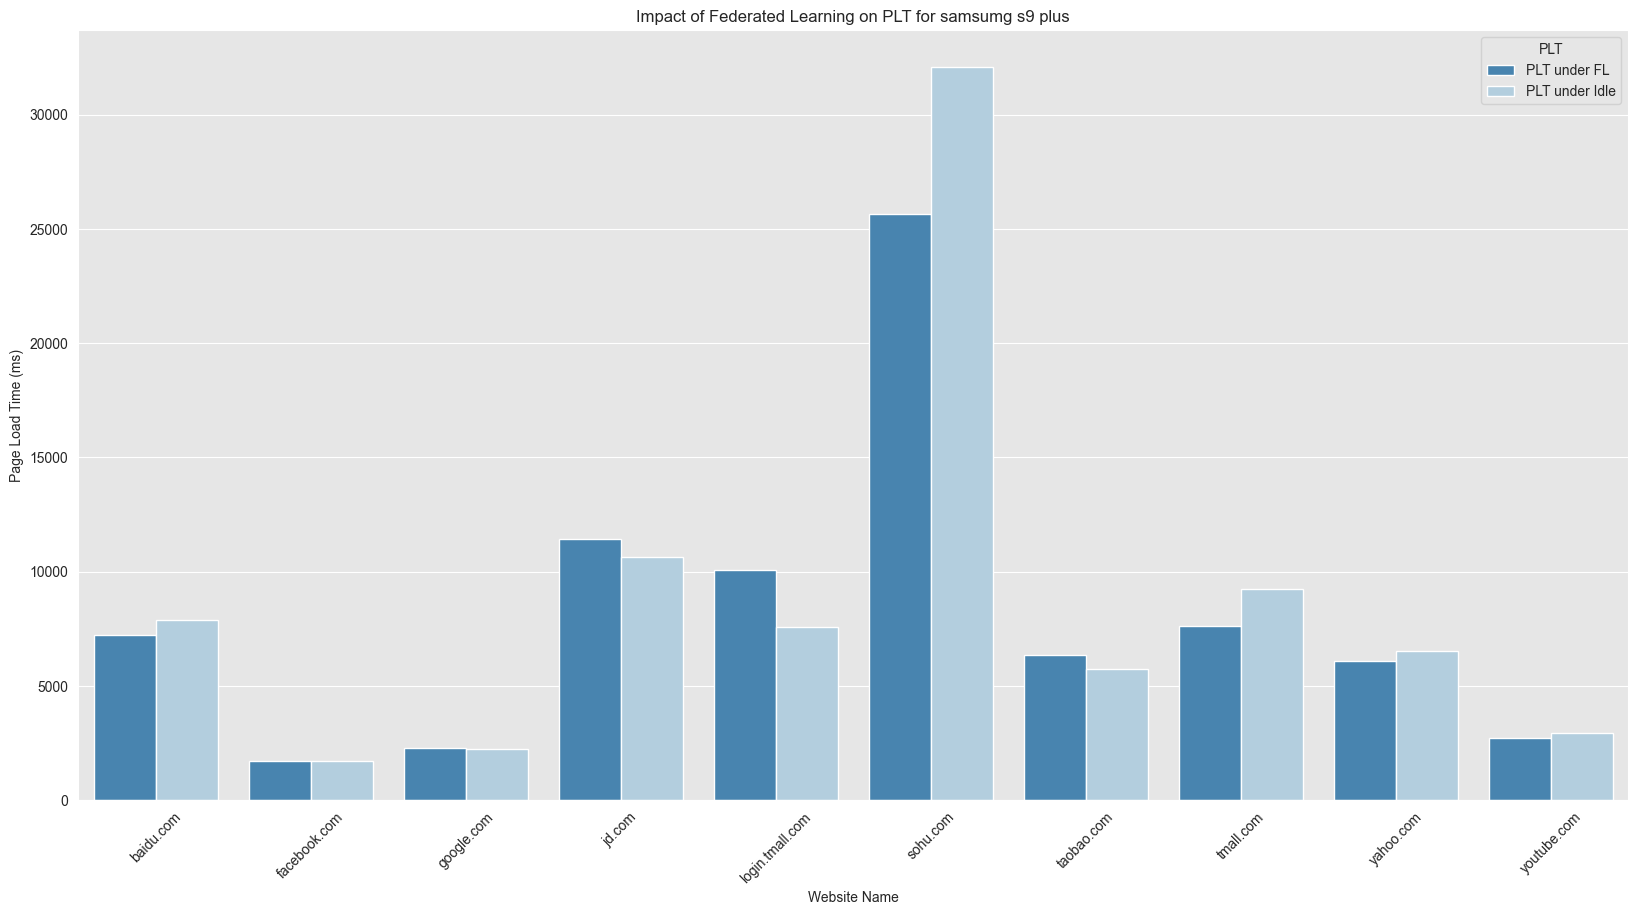

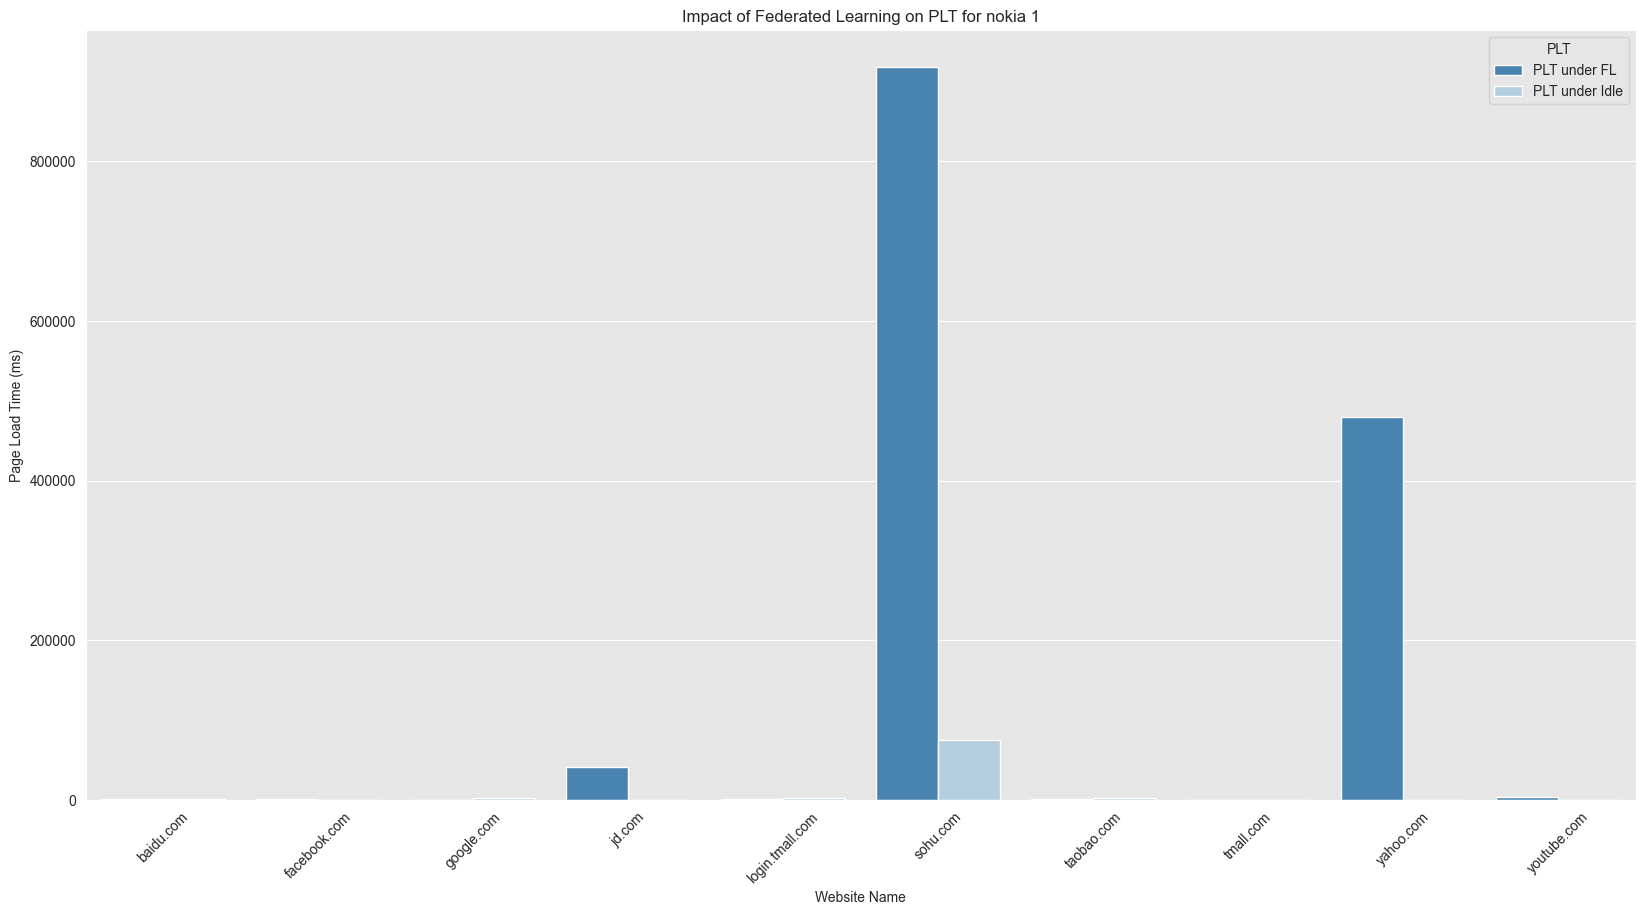

In [169]:


# replace package name with app name
unique_mobile_names = df_fl['mobile_name'].unique()
for mobile_name in unique_mobile_names:
    filter_df_fl = df_fl[df_fl['mobile_name'] == mobile_name]
    filter_df_nonfl = df_nonfl[df_nonfl['mobile_name'] == mobile_name]
    mean_df_fl  = filter_df_fl.groupby('website_name').agg({'loadtime_data': 'mean'}).reset_index()
    mean_df_nonfl  = filter_df_nonfl.groupby('website_name').agg({'loadtime_data': 'mean'}).reset_index()
    mean_df_fl = mean_df_fl.rename(columns={'loadtime_data': 'PLT under FL'})
    mean_df_nonfl = mean_df_nonfl.rename(columns={'loadtime_data': 'PLT under Idle'})
    mean_df = pd.merge(mean_df_fl, mean_df_nonfl, on='website_name')
    plt.figure(figsize=(20,10))
    df_melted = pd.melt(mean_df, id_vars='website_name', var_name='PLT', value_name='Page Load Time')

    sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
   
    sns.barplot(x='website_name', y='Page Load Time', hue='PLT', data=df_melted, palette='Blues_r')
    plt.xticks(rotation=45)
    plt.xlabel('Website Name')
    # #legend 
    # plt.legend(title='TTID', loc='upper left', labels=['Federated Learning', 'Idle'], color=['#1f77b4', '#ff7f0e'])

    plt.ylabel('Page Load Time (ms)')
    plt.title('Impact of Federated Learning on PLT for ' + mobile_name)



    plt.show()





### Statistical Analysis : Hypothesis Testing relevant to the two key questions

#### Question 1: How does plt vary under FL vs idle scenario?

##### Null Hypothesis: There is no difference in the plt under FL and idle scenario for each website for each phone.
##### Alternate Hypothesis: There is an increase in the plt under FL scenario than idle scenario for each website for each phone.
##### Statistical Test: two sample t-test
##### One tail test: We are only interested in the increase in plt under FL scenario than idle scenario.
##### Confidence Interval: 95%

do same as i did

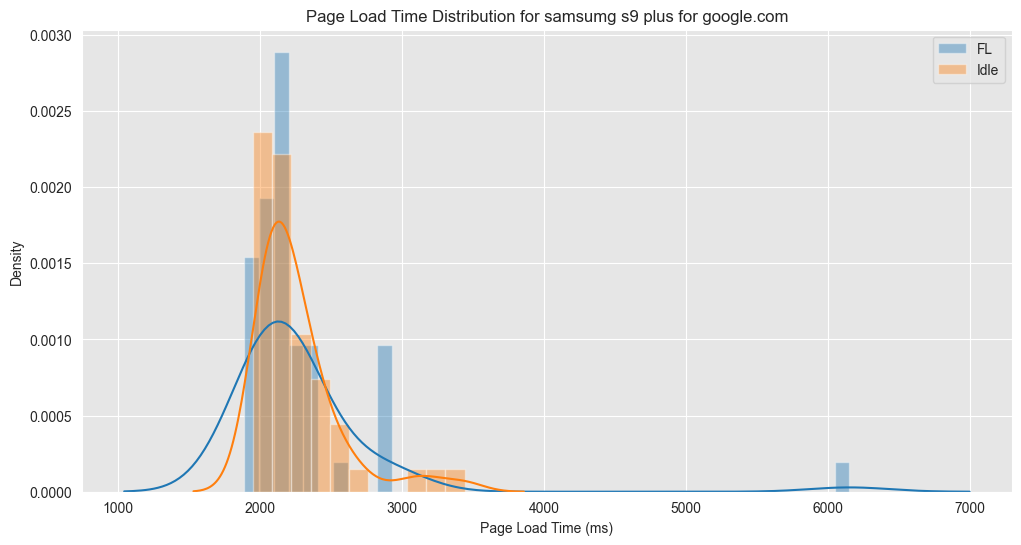

Confident Interval:  (-159.08433400466052, 222.08433400466052)


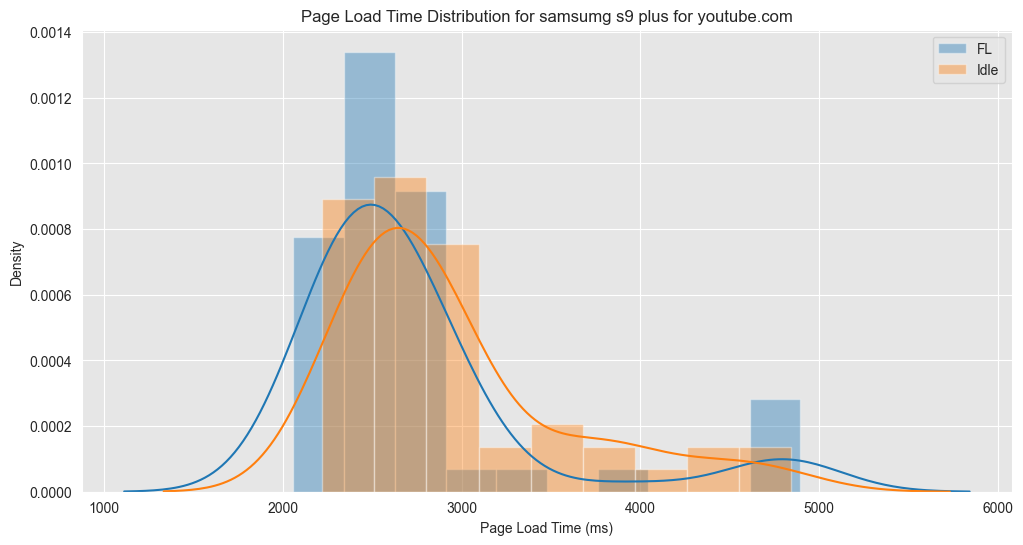

Confident Interval:  (-463.94123163793813, 59.94123163793813)


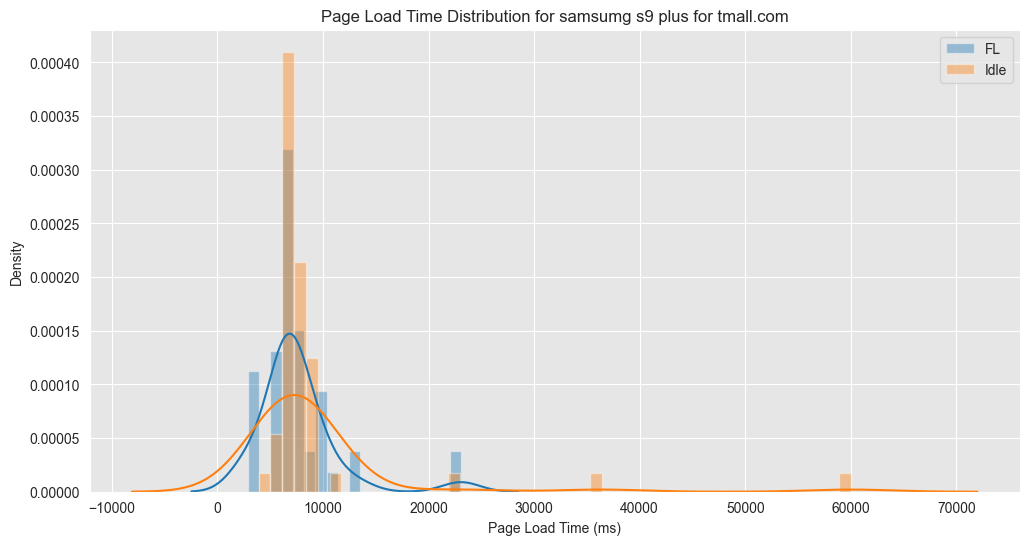

Confident Interval:  (-4287.820321912079, 1019.020321912079)


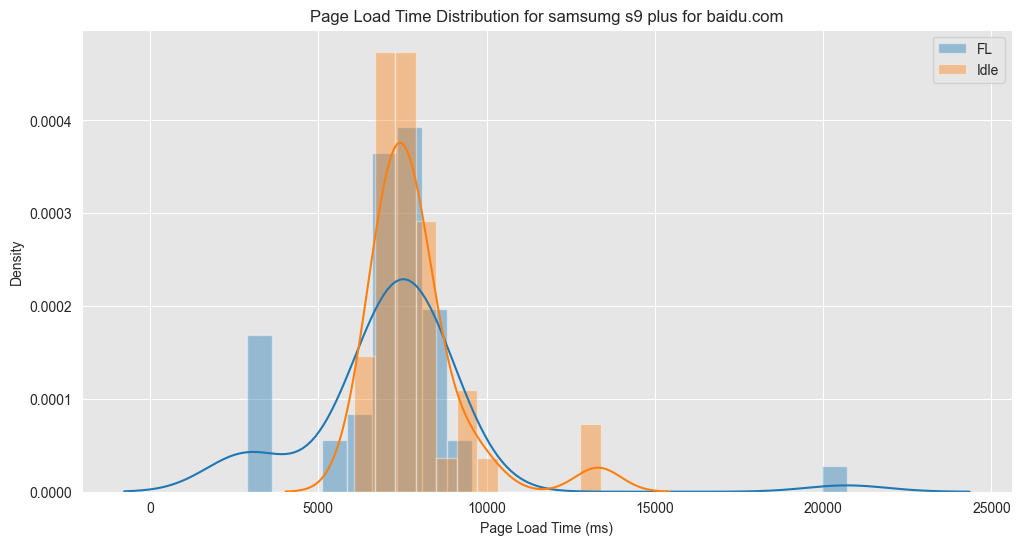

Confident Interval:  (-1519.3171187627304, 200.01156320717575)


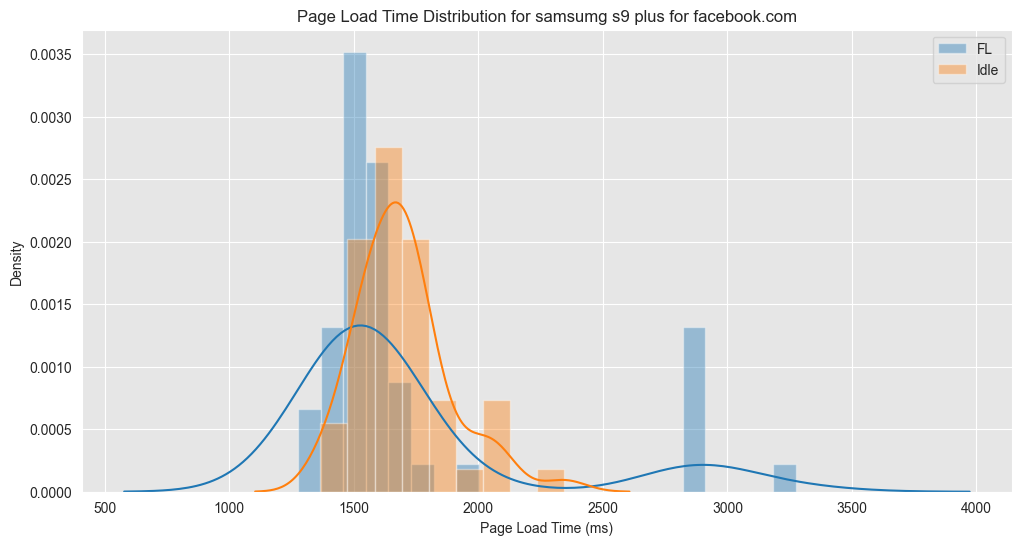

Confident Interval:  (-116.49137054329728, 184.49137054329728)


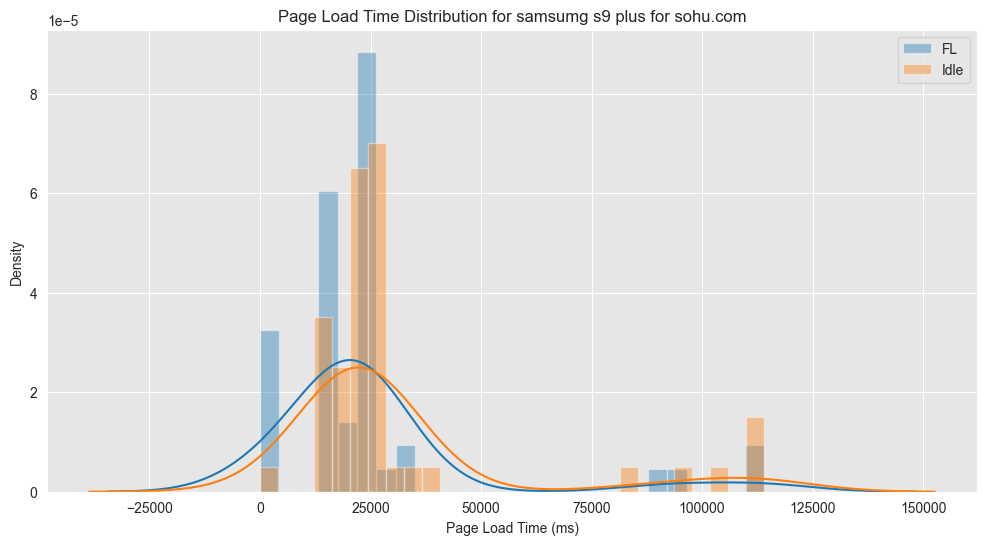

Confident Interval:  (-16941.35969102909, 4065.441282865828)


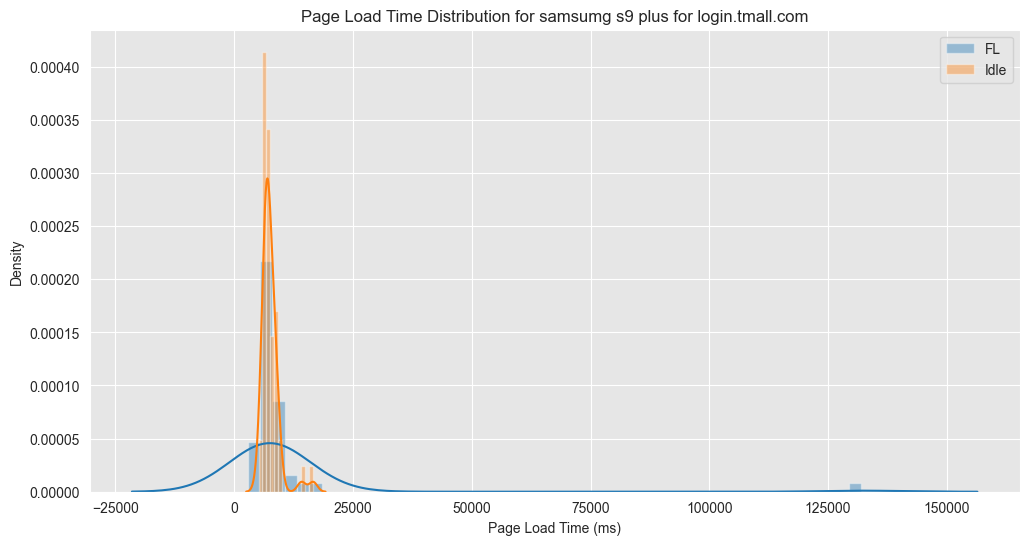

Confident Interval:  (-2462.869744947665, 7461.069744947666)


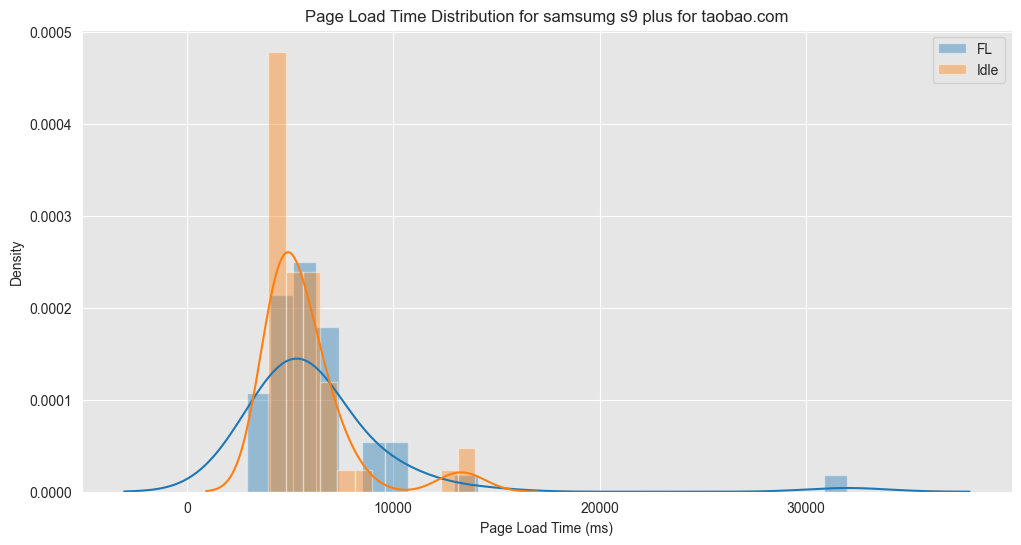

Confident Interval:  (-730.5599881345856, 1960.9599881345853)


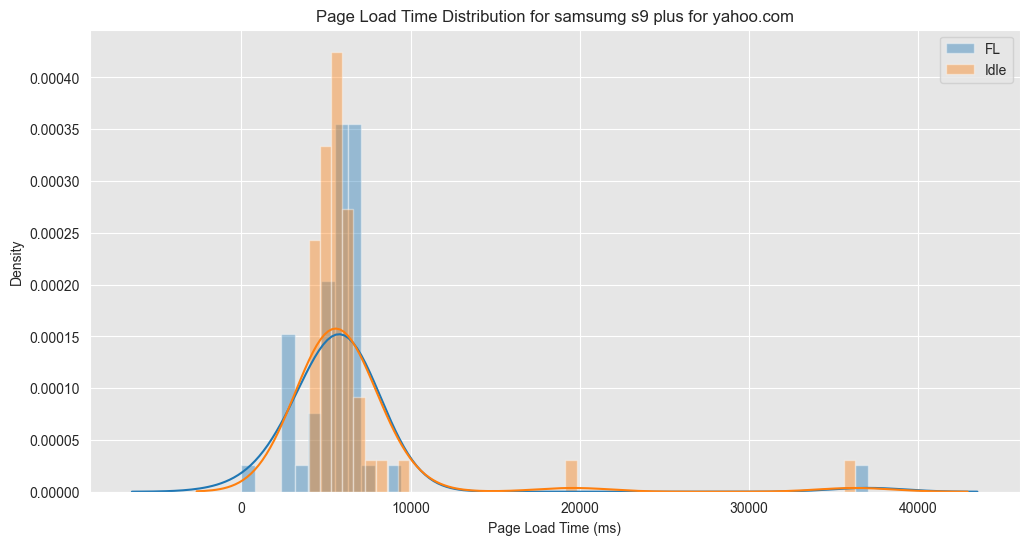

Confident Interval:  (-2299.2644599780565, 1447.0647045780574)


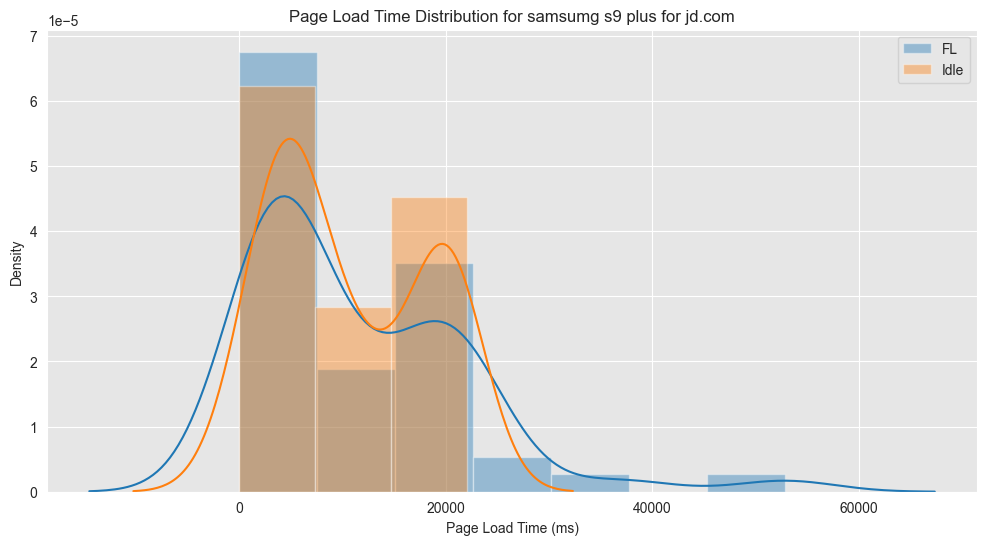

Confident Interval:  (-2810.7698695940194, 4417.097522259835)
                                  lower_bound   p_value  upper_bound
website_name    mobile_name                                         
baidu.com       samsumg s9 plus  -1519.317119  0.931583   200.011563
facebook.com    samsumg s9 plus   -116.491371  0.329714   184.491371
google.com      samsumg s9 plus   -159.084334  0.373460   222.084334
jd.com          samsumg s9 plus  -2810.769870  0.332111  4417.097522
login.tmall.com samsumg s9 plus  -2462.869745  0.164154  7461.069745
sohu.com        samsumg s9 plus -16941.359691  0.883697  4065.441283
taobao.com      samsumg s9 plus   -730.559988  0.186604  1960.959988
tmall.com       samsumg s9 plus  -4287.820322  0.884241  1019.020322
yahoo.com       samsumg s9 plus  -2299.264460  0.671656  1447.064705
youtube.com     samsumg s9 plus   -463.941232  0.933051    59.941232


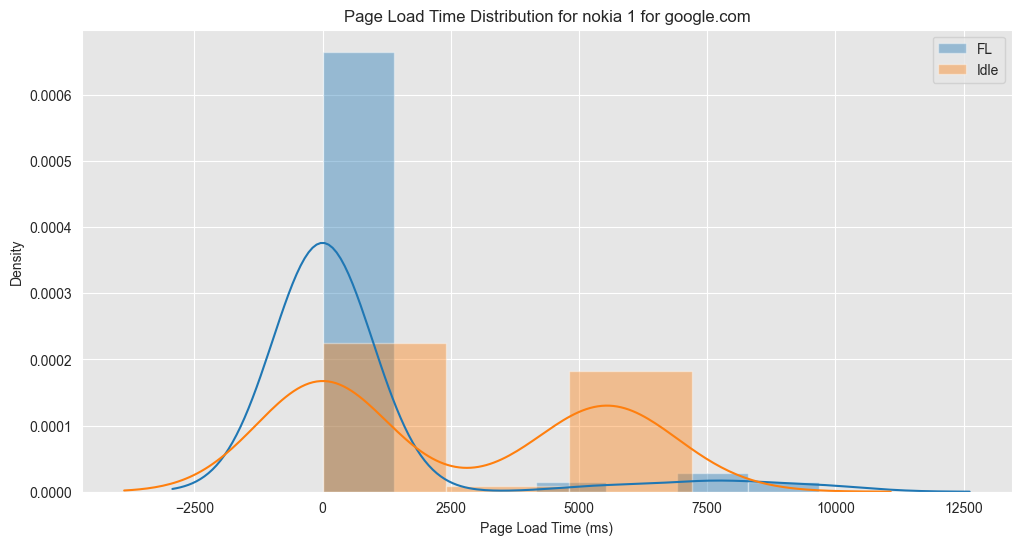

Confident Interval:  (-2915.742454550542, -955.0975454494572)


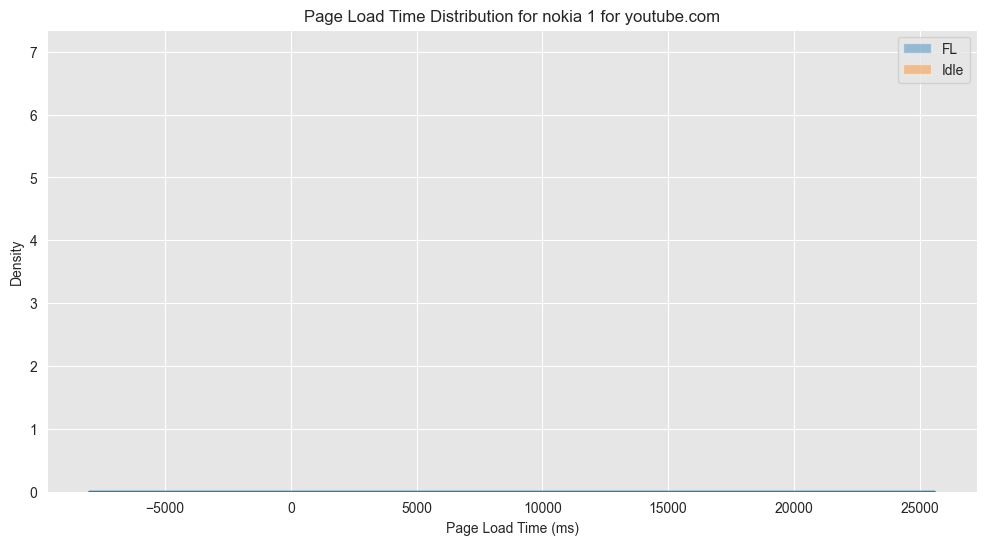

Confident Interval:  (2445.431229034976, 5682.288770965024)


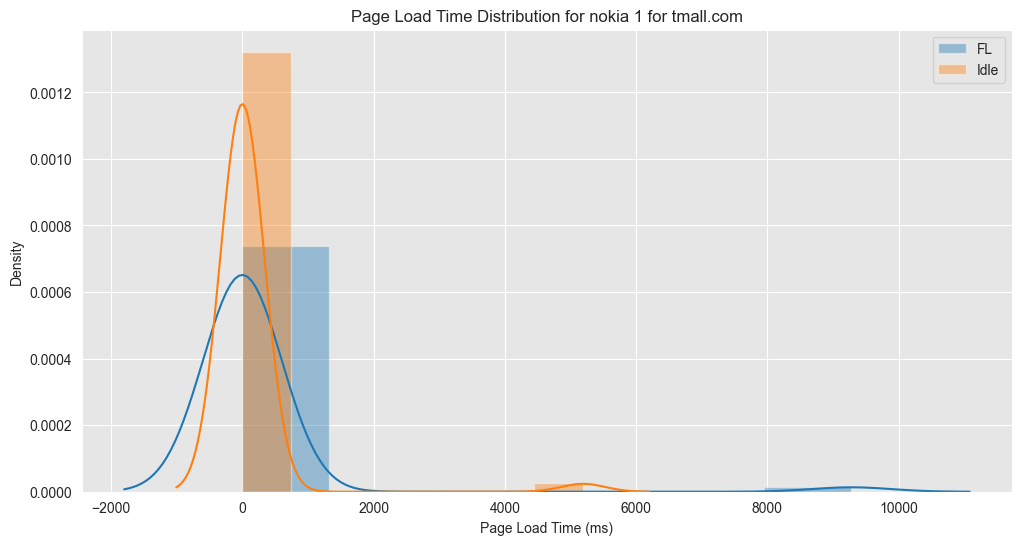

Confident Interval:  (-334.94884473946655, 498.5488447394666)


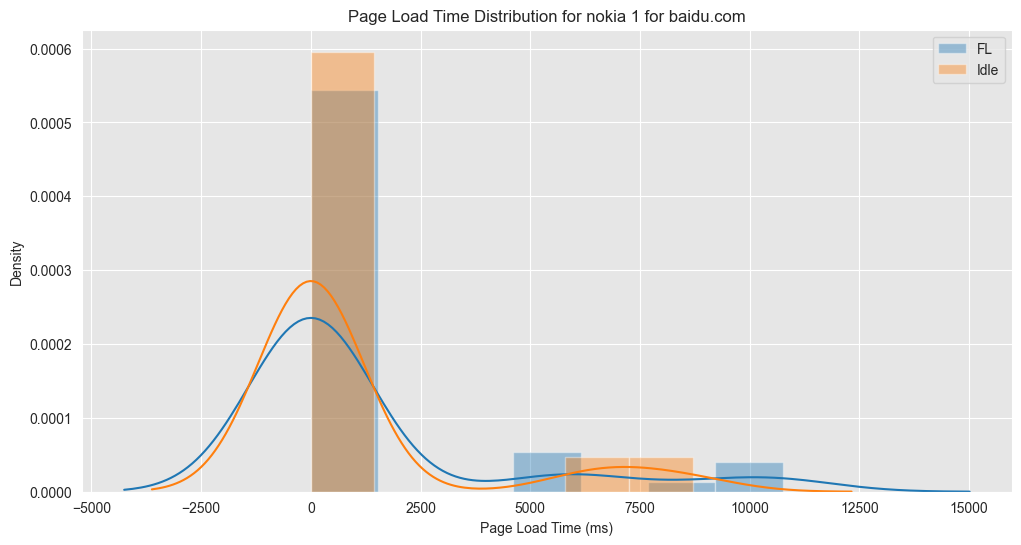

Confident Interval:  (-860.595125014122, 1443.5283346616175)


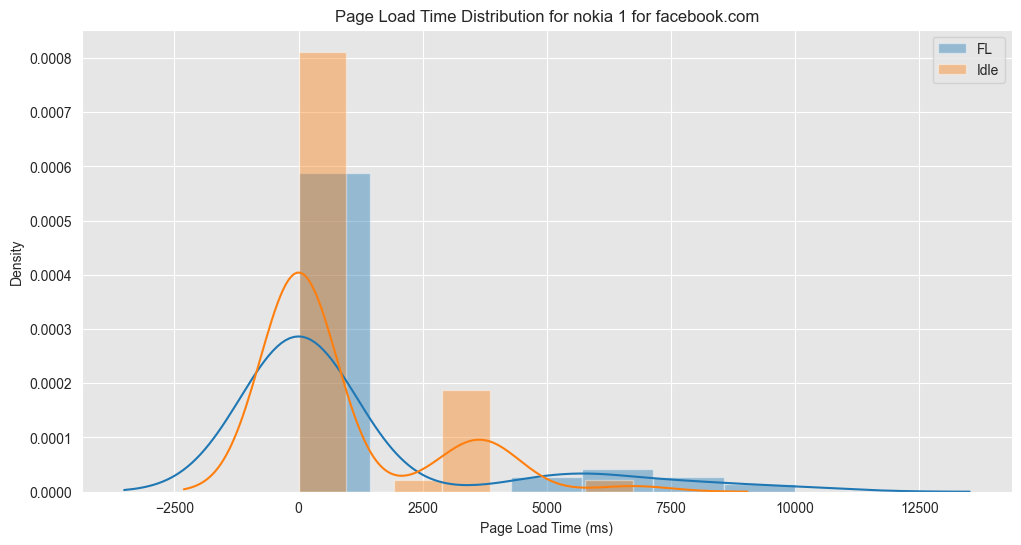

Confident Interval:  (-634.8007408176188, 1063.1207408176188)


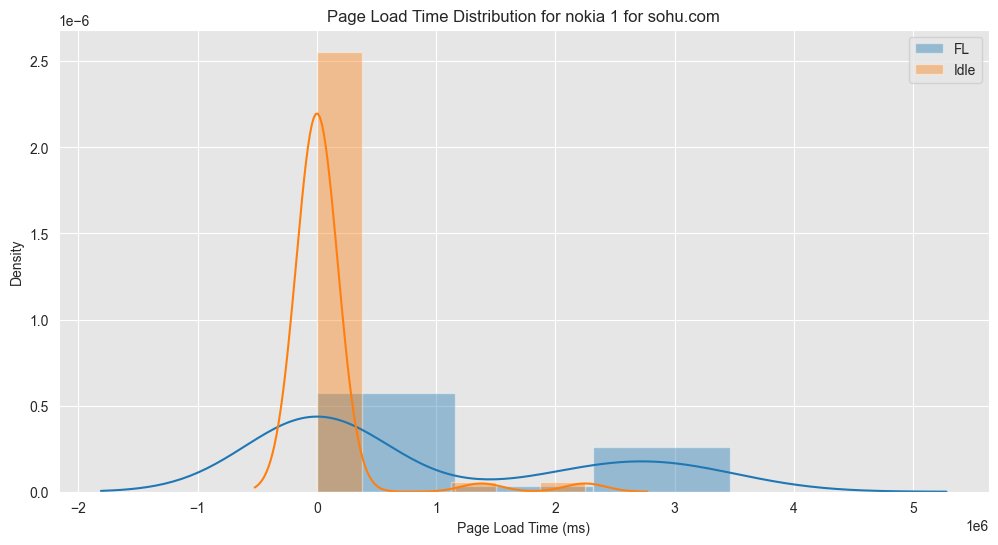

Confident Interval:  (460991.0286558076, 1223518.3746775258)


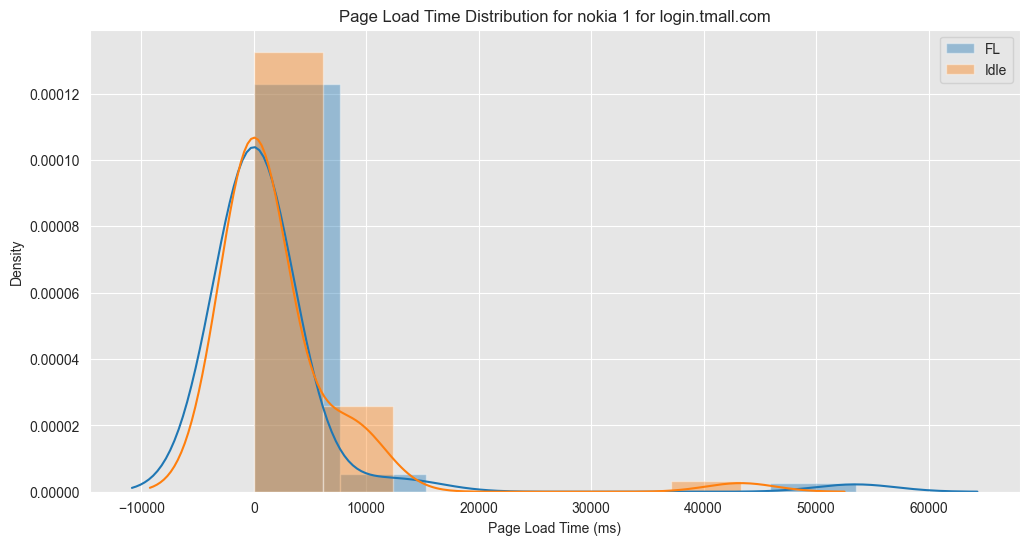

Confident Interval:  (-3555.9724519314077, 2196.412451931408)


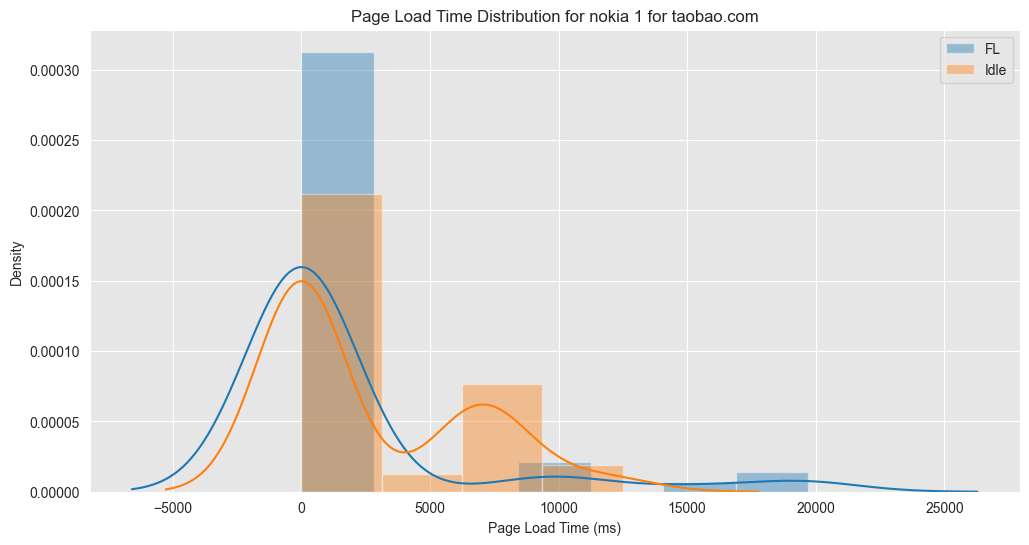

Confident Interval:  (-2669.2596621126595, 742.4996621126595)


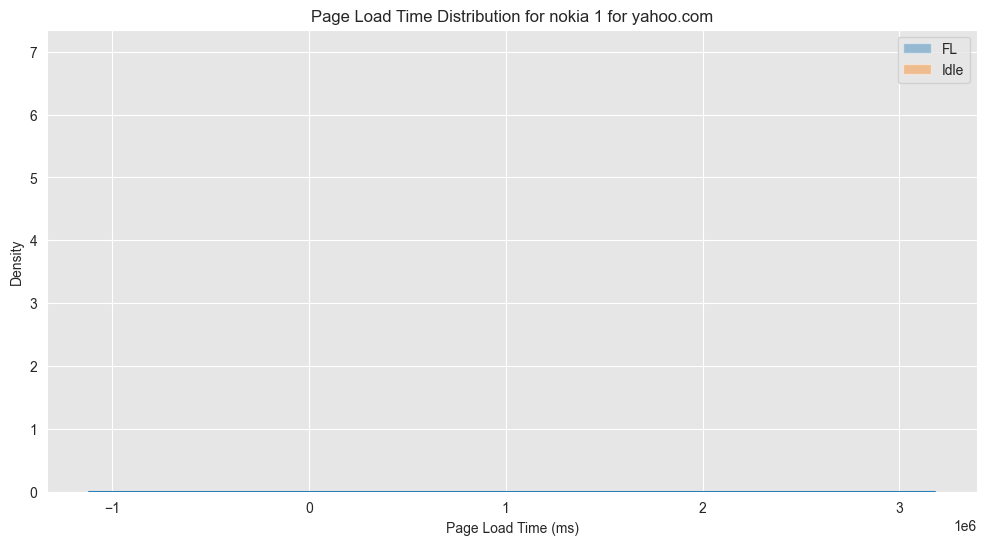

Confident Interval:  (252567.17219287518, 705962.9094397778)


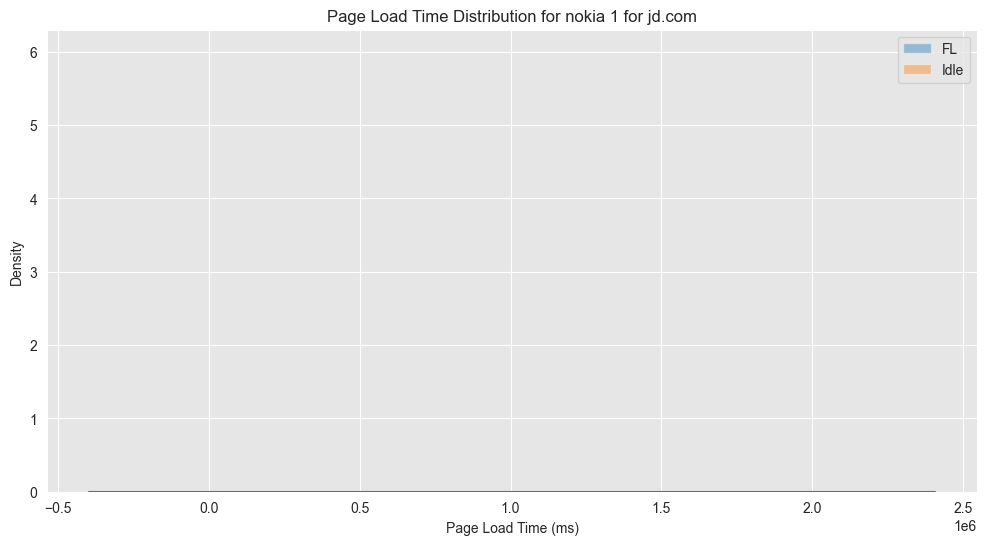

Confident Interval:  (-39379.57224489798, 121420.34775510206)
                               lower_bound   p_value   upper_bound
website_name    mobile_name                                       
baidu.com       nokia 1        -860.595125  0.310593  1.443528e+03
facebook.com    nokia 1        -634.800741  0.311140  1.063121e+03
google.com      nokia 1       -2915.742455  0.999898 -9.550975e+02
jd.com          nokia 1      -39379.572245  0.161163  1.214203e+05
login.tmall.com nokia 1       -3555.972452  0.677878  2.196412e+03
sohu.com        nokia 1      460991.028656  0.000030  1.223518e+06
taobao.com      nokia 1       -2669.259662  0.864410  7.424997e+02
tmall.com       nokia 1        -334.948845  0.350756  4.985488e+02
yahoo.com       nokia 1      252567.172193  0.000069  7.059629e+05
youtube.com     nokia 1        2445.431229  0.000005  5.682289e+03


In [170]:

unique_website_names = df_fl['website_name'].unique()

for mobile_name in unique_mobile_names:
    p_val = []
    lower_bound = []
    upper_bound = []
    for website_name in unique_website_names:
        filter_df_fl = df_fl[(df_fl['mobile_name'] == mobile_name) & (df_fl['website_name'] == website_name)]
        filter_df_nonfl = df_nonfl[(df_nonfl['mobile_name'] == mobile_name) & (df_nonfl['website_name'] == website_name)]
        plt.figure(figsize=(12, 6))
       
        
        sns.distplot(filter_df_fl['loadtime_data'], label='FL')
        sns.distplot(filter_df_nonfl['loadtime_data'], label='Idle')
        plt.xlabel('Page Load Time (ms)')
        plt.ylabel('Density')
        plt.legend()
        plt.title('Page Load Time Distribution for ' + mobile_name + ' for ' + website_name)
        plt.show()

        
        # t_test_filter_fl = filter_df_fl['loadtime_data']
        # t_test_filter_nonfl = filter_df_nonfl['loadtime_data']
        # t_test_youtube.head(20)
        t_test = stats.ttest_ind(filter_df_fl['loadtime_data'], filter_df_nonfl['loadtime_data'], equal_var=False, alternative='greater')
        diff = filter_df_fl['loadtime_data'].mean() - filter_df_nonfl['loadtime_data'].mean()
        std_combined = np.sqrt((filter_df_fl['loadtime_data'].std()**2/len(filter_df_fl['loadtime_data'])) + (filter_df_nonfl['loadtime_data'].std()**2/len(filter_df_nonfl['loadtime_data'])))
        error_margin = 1.96 * std_combined
        # confident_interval = stats.t.interval(0.95, len(filter_df_fl['loadtime_data'])-1, loc=diff, scale=stats.sem( filter_df_fl['loadtime_data'] - filter_df_nonfl['loadtime_data']))
        confident_interval = (diff - error_margin, diff + error_margin)
        # print(package_name, t_test)
        print("Confident Interval: ", confident_interval)
        p_val.append(t_test[1])
        lower_bound.append(confident_interval[0])
        upper_bound.append(confident_interval[1])
    
    #create a dataframe
    data = {
    'website_name': unique_website_names,
    'mobile_name': [mobile_name] * len(unique_website_names),
    'p_value': p_val,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound
    }
    t_test_df = pd.DataFrame(data)
    #df = pd.DataFrame(data)

    # Create a pivot table
    pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                             index=['website_name', 'mobile_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

    
    # save
    pivot_table.to_csv(f'p_value_{mobile_name}.csv')

    print(pivot_table)

        # #graphical representation
        # plt.figure(figsize=(12, 6))
        # sns.distplot(t_test_youtube['ttid_under_FL'], label='FL')
        # sns.distplot(t_test_youtube['ttid_under_Idle'], label='Idle')
        # plt.legend()
        # plt.title('Youtube')
        # plt.show()




    

#### Question 2: Are the phones with low GB RAM impacted more than the phones with high GB RAM?

##### Null Hypothesis: There is no difference in the plt under FL for nokia 1 and nexus 6p in each website.
##### Alternate Hypothesis: There is an increase in the plt under FL for nokia 1 than nexus 6p in each website.
##### Statistical Test: two sample t-test
##### One tail test: We are only interested in the increase in plt under FL for nokia 1 than nexus 6p in each website.
##### Confidence Interval: 95%

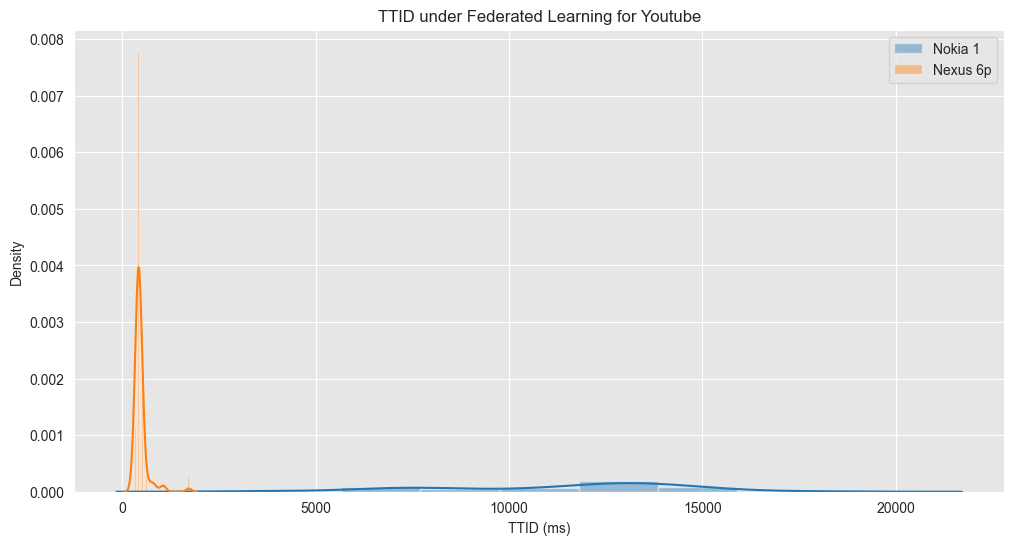

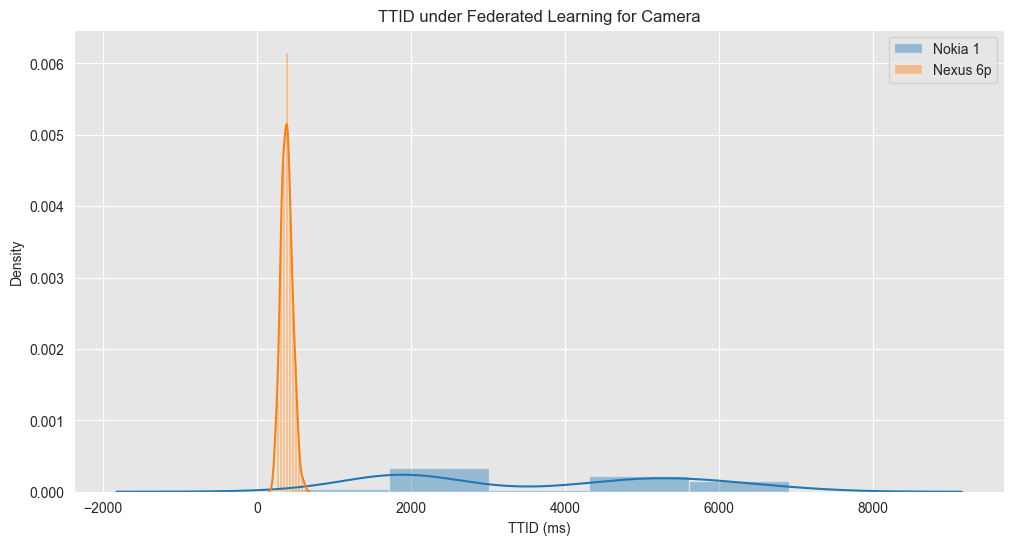

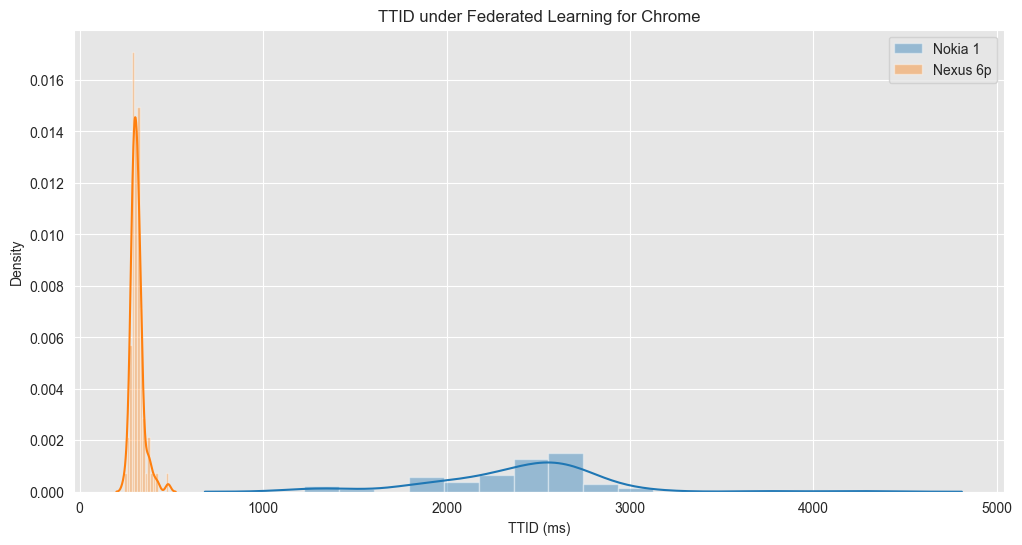

In [ ]:
#nokia vs nexus 
#alternate hypothesis: mean of nokia > mean of nexus
#null hypothesis: mean of nokia <= mean of nexus
filter_df = df[(df['mobile_name'] == 'nokia 1') | (df['mobile_name'] == 'nexus 6p')]
p_val = []
lower_bound = []
upper_bound = []
for package_name in unique_package_names:
    package_filter_df = filter_df[filter_df['package_name'] == package_name]
    package_filter_df_nokia = package_filter_df[package_filter_df['mobile_name'] == 'nokia 1']
    package_filter_df_nexus = package_filter_df[package_filter_df['mobile_name'] == 'nexus 6p']
    plt.figure(figsize=(12, 6))
    

    sns.distplot(package_filter_df_nokia['ttid_under_FL'], label='Nokia 1')
    sns.distplot(package_filter_df_nexus['ttid_under_FL'], label='Nexus 6p')
    plt.xlabel('TTID (ms)')
    plt.ylabel('Density')
    plt.legend()
    plt.title('TTID under Federated Learning for ' + package_name)
    plt.show()

    t_test = stats.ttest_ind(package_filter_df_nokia['ttid_under_FL'], package_filter_df_nexus['ttid_under_FL'], equal_var=False, alternative='greater')
    confident_interval = stats.t.interval(0.95, len(package_filter_df_nokia['ttid_under_FL'])-1, loc=package_filter_df_nokia['ttid_under_FL'].mean(), scale=stats.sem(package_filter_df_nokia['ttid_under_FL']))
    # print(package_name, t_test)
    # print("Confident Interval: ", confident_interval)
    p_val.append(t_test[1])
    lower_bound.append(confident_interval[0])
    upper_bound.append(confident_interval[1])

# #create a dataframe
data = {
'package_name': unique_package_names,
'p_value': p_val,
'lower_bound': lower_bound,
'upper_bound': upper_bound
}
t_test_df = pd.DataFrame(data)
#df = pd.DataFrame(data)

# Create a pivot table

pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                            index=['package_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

# save
pivot_table.to_csv(f'p_value_nokia_vs_nexus.csv')




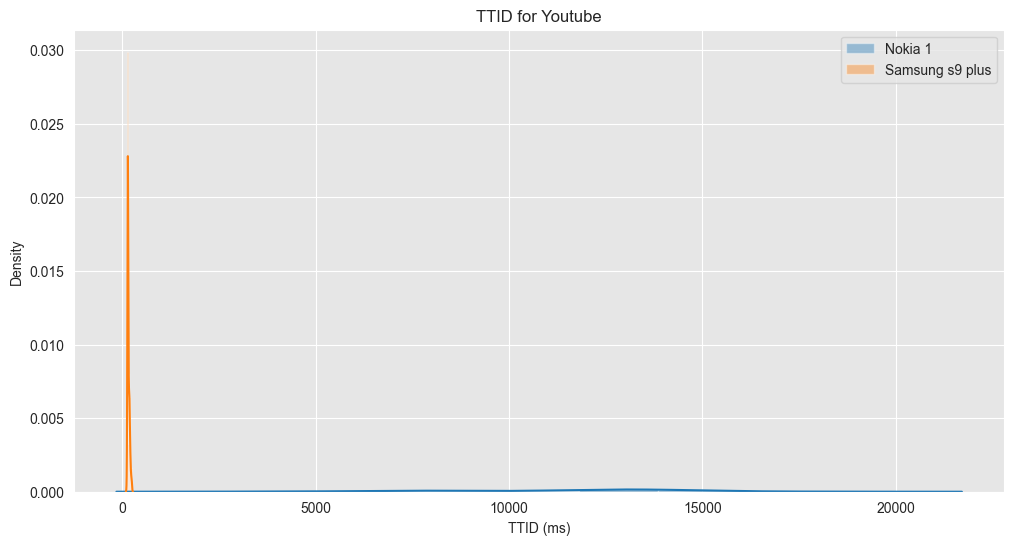

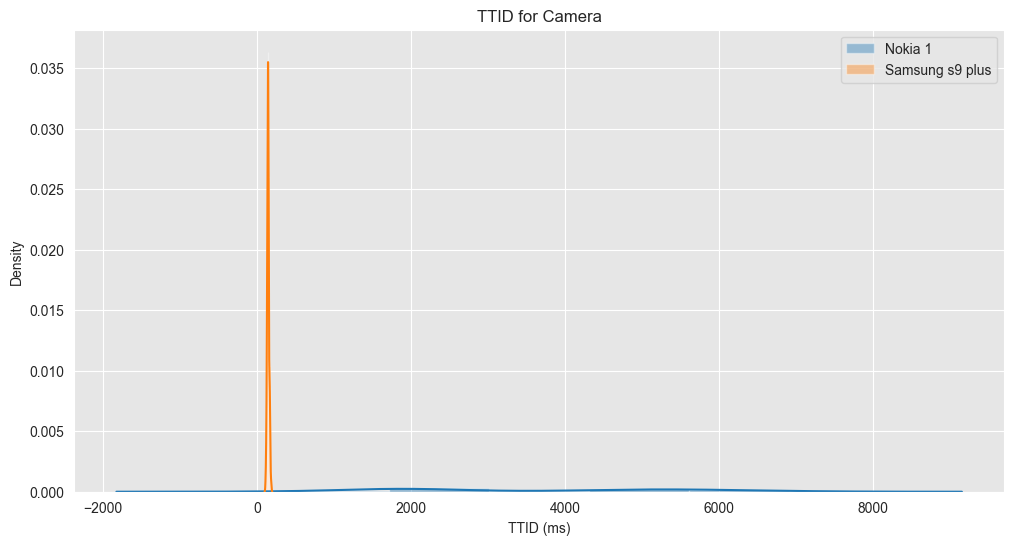

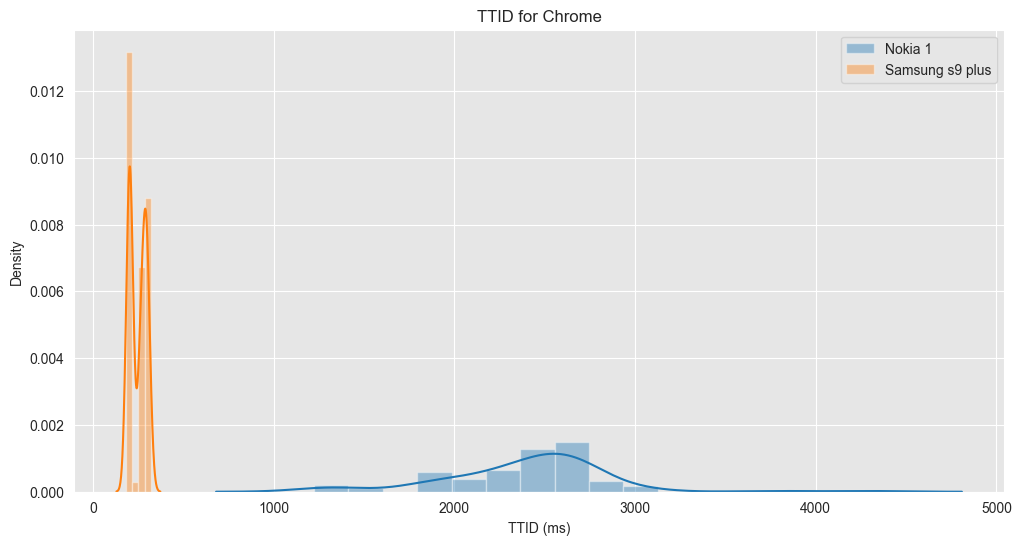

In [ ]:
#nokia vs samsung s9 plus
#alternate hypothesis: mean of nokia > mean of samsung s9 plus
#null hypothesis: mean of nokia <= mean of samsung s9 plus
filter_df = df[(df['mobile_name'] == 'nokia 1') | (df['mobile_name'] == 'samsung s9 plus')]
p_val = []
lower_bound = []
upper_bound = []
for package_name in unique_package_names:
    package_filter_df = filter_df[filter_df['package_name'] == package_name]
    package_filter_df_nokia = package_filter_df[package_filter_df['mobile_name'] == 'nokia 1']
    package_filter_df_samsung = package_filter_df[package_filter_df['mobile_name'] == 'samsung s9 plus']
    plt.figure(figsize=(12, 6))
    

    sns.distplot(package_filter_df_nokia['ttid_under_FL'], label='Nokia 1')
    sns.distplot(package_filter_df_samsung['ttid_under_FL'], label='Samsung s9 plus')
    plt.xlabel('TTID (ms)')
    plt.ylabel('Density')
    plt.legend()
    plt.title('TTID under Federated Learning for ' + package_name)
    plt.show()

    t_test = stats.ttest_ind(package_filter_df_nokia['ttid_under_FL'], package_filter_df_samsung['ttid_under_FL'], equal_var=False, alternative='greater')
    confident_interval = stats.t.interval(0.95, len(package_filter_df_nokia['ttid_under_FL'])-1, loc=package_filter_df_nokia['ttid_under_FL'].mean(), scale=stats.sem(package_filter_df_nokia['ttid_under_FL']))
    # print(package_name, t_test)
    # print("Confident Interval: ", confident_interval)
    p_val.append(t_test[1])
    lower_bound.append(confident_interval[0])
    upper_bound.append(confident_interval[1])

# #create a dataframe
data = {
'package_name': unique_package_names,
'p_value': p_val,
'lower_bound': lower_bound,
'upper_bound': upper_bound
}
t_test_df = pd.DataFrame(data)
#df = pd.DataFrame(data)

# Create a pivot table

pivot_table = pd.pivot_table(t_test_df, values=['p_value', 'lower_bound', 'upper_bound'],
                            index=['package_name'], aggfunc={'p_value': 'mean', 'lower_bound': 'mean', 'upper_bound': 'mean'})

# save
pivot_table.to_csv(f'p_value_nokia_vs_samsung.csv')




In [ ]:
#sns box plot ofr youtube , camera and chrome

# plt.figure(figsize=(10, 5))

# sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
# sns.boxplot(x='package_name', y='Response Time FL', data=df, palette='Blues_r')
# plt.xticks(rotation=45)
# plt.xlabel('App Name')
# plt.ylabel('Response Time (ms)')
# plt.title('Impact of Federated Learning on Response Time')

# #grey background

# plt.show()


In [ ]:
# plt.figure(figsize=(10, 5))

# sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
# sns.boxplot(x='package_name', y='Response Time Idle', data=df, palette='Blues_r')
# plt.xticks(rotation=45)
# plt.xlabel('App Name')
# plt.ylabel('Response Time (ms)')
# plt.title('Response Time without Federated Learning')

# #grey background

# plt.show()

In [ ]:
# import numpy as np

# kswap_rt_fl = np.array([
#     4039.619571,
#     2703.662256,
#     2056.491282,
#     8280.249276,
#     11327.72416,
#     461.957115,
#     1015.805793,
#     1322.257674,
#     1316.109677,
#     1242.874747,
#     10108.5126,
#     3505.648193,
#     928.566014
# ])

# # Print the array
# print(kswap_rt_fl)


# import numpy as np

# kswap_rt_idle = np.array([
#     379.002737,
#     0,
#     78.529624,
#     744.295221,
#     799.17437,
#     236.046098,
#     478.00413,
#     5196.215553,
#     1530.550605,
#     816.77439,
#     2562.552859,
#     0,
#     3177.065218
# ])

# # Print the array
# print(kswap_rt_idle)

# #concatenate in a dataframe
# df_kswap = pd.DataFrame({'Kswapd RunTime FL': kswap_rt_fl, 'Kswapd RunTime Idle': kswap_rt_idle})

# #make sns violin plot

# plt.figure(figsize=(10, 5))

# sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
# sns.violinplot(data=df_kswap, palette='Blues_r')
# plt.xticks(rotation=45)
# plt.xlabel('Kswapd')
# plt.ylabel('Run Time (ms)')
# plt.title('Impact of Federated Learning on Kswapd Run Time')

# #grey background
# plt.show()


In [ ]:
# import numpy as np

# lmkd_rt_fl = np.array([
#     145.404781,
#     112.329398,
#     206.079556,
#     187.309175,
#     187.585565,
#     208.768642,
#     192.132317,
#     115.147628,
#     283.381956,
#     225.751946,
#     217.628331,
#     240.297634,
#     209.284552
# ])

# # Print the array
# print(lmkd_rt_fl)

# import numpy as np

# lmkd_rt_idle = np.array([
#     193.326632,
#     65.618386,
#     98.211398,
#     113.443707,
#     466.251123,
#     171.91871,
#     162.228628,
#     643.279833,
#     390.053651,
#     367.47255,
#     546.139055,
#     27.230853,
#     549.884757
# ])

# # Print the array
# print(lmkd_rt_idle)

# #concatenate in a dataframe
# df_lmkd = pd.DataFrame({'Lmkd RunTime FL': lmkd_rt_fl, 'Lmkd RunTime Idle': lmkd_rt_idle})

# #make sns violin plot

# plt.figure(figsize=(10, 5))

# sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
# sns.violinplot(data=df_lmkd, palette='Blues_r')
# plt.xticks(rotation=45)
# plt.xlabel('Lmkd')
# plt.ylabel('Run Time (ms)')
# plt.title('Impact of Federated Learning on Lmkd Run Time')

# plt.show()
